In [1]:
import pandas as pd
#pd.options.display.max_rows=17760
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from datetime import datetime
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
from  sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PowerTransformer

In [2]:
train=pd.read_csv('../input/diabetes-prediction-competitiontfug-chd-nov-2022/train_data.csv')
test = pd.read_csv("../input/diabetes-prediction-competitiontfug-chd-nov-2022/test_data.csv")
data3=pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

* age: 3 seviyeli yaş kategorisi (_AGEG5YR kod kitabına bakın) 1 = 18-24, 9 = 60-64, 13 = 80 veya daha büyük
* sex: 0 = kadın, 1 = erkek
* HighChol: 0 = yüksek kolesterol yok, 1 = yüksek kolesterol
* CholCheck: 0 = 5 yılda kolesterol kontrolü yok, 1 = evet 5 yılda kolesterol kontrolü
* BMI: Vücut kitle indeksi
* Smoker: Hayatınız boyunca en az 100 sigara içtiniz mi? [Not: 5 paket = 100 sigara] 0 = hayır, 1 = evet
* HeartDiseaseorAttack: Koroner kalp hastalığı (KKH) veya miyokard enfarktüsü (MI) 0 = hayır, 1 = evet
* PhysActivity: Son 30 gündeki fiziksel aktivite - iş dahil değil 0 = hayır, 1 = evet
* Fruits: Günde bir veya daha fazla meyve tüketin 0 = hayır, 1 = evet
* Veggies: Günde 1 veya daha fazla Sebze tüketin 0 = hayır, 1 = evet
* HvyAlcoholConsump: Yetişkin erkek: haftada 14'ten fazla içki. Yetişkin kadın: haftada 7'den fazla içki. 0 = hayır, 1 = evet
* GenHlth: Genel olarak sağlığınızın: (ölçek 1-5) olduğunu söyleyebilir misiniz? 1 = mükemmel, 2 = çok iyi, 3 = iyi, 4 = orta, 5 = kötü
* MentHlth: Ruh sağlığının zayıf olduğu günler ölçeği 1-30 gün
* PhysHlth: Son 30 gün içindeki fiziksel hastalık veya yaralanma günleri 1-30 arası ölçek
* DiffWalk: Yürümek veya merdiven çıkmakta ciddi zorluk çekiyor musunuz? 0 = hayır, 1 = evet
* Hypertension: 0 = hipertansiyon yok, 1 = hipertansiyon
* Stroke: 0 = hayır, 1 = evet
* Diabetes: 0 = diyabet yok, 1 = diyabet (Hedef değişken)

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80692.0,8.571841,2.852525,1.0,7.0,9.0,11.0,13.0
Sex,80692.0,0.481919,0.499676,0.0,0.0,0.0,1.0,1.0
HighChol,80692.0,0.518750,0.499651,0.0,0.0,1.0,1.0,1.0
CholCheck,80692.0,0.969687,0.171448,0.0,1.0,1.0,1.0,1.0
BMI,80692.0,29.897747,7.365230,12.0,25.0,29.0,33.0,98.0
Smoker,80692.0,0.494894,0.499977,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,80692.0,0.141823,0.348871,0.0,0.0,0.0,0.0,1.0
PhysActivity,80692.0,0.680861,0.466146,0.0,0.0,1.0,1.0,1.0
Fruits,80692.0,0.588757,0.492062,0.0,0.0,1.0,1.0,1.0
Veggies,80692.0,0.777735,0.415771,0.0,1.0,1.0,1.0,1.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   80692 non-null  float64
 1   Sex                   80692 non-null  float64
 2   HighChol              80692 non-null  float64
 3   CholCheck             80692 non-null  float64
 4   BMI                   80692 non-null  float64
 5   Smoker                80692 non-null  float64
 6   HeartDiseaseorAttack  80692 non-null  float64
 7   PhysActivity          80692 non-null  float64
 8   Fruits                80692 non-null  float64
 9   Veggies               80692 non-null  float64
 10  HvyAlcoholConsump     80692 non-null  float64
 11  GenHlth               80692 non-null  float64
 12  MentHlth              80692 non-null  float64
 13  PhysHlth              80692 non-null  float64
 14  DiffWalk              80692 non-null  float64
 15  Diabetes           

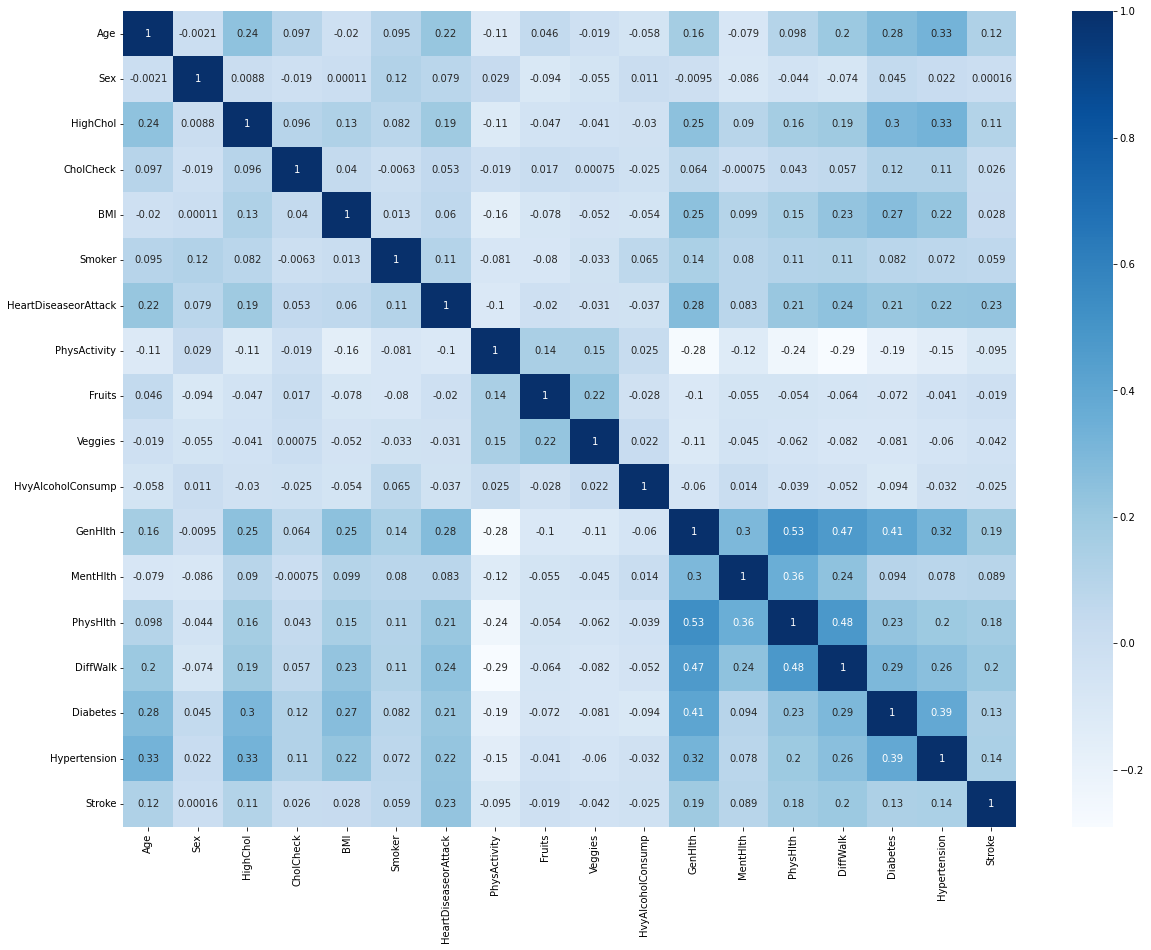

In [5]:
plt.figure(figsize=(20,15))
p=sns.heatmap(train.corr(),annot=True,cmap='Blues')
plt.show()

In [6]:
diabetes=train[['Diabetes']]

In [7]:
train.drop(columns='Diabetes',axis=1,inplace=True)

In [8]:
train=train.join(diabetes)

In [9]:
cor_train=train.corr()
cor_train.style.background_gradient(cmap='coolwarm')

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes
Age,1.000000,-0.002097,0.240798,0.096641,-0.020402,0.094777,0.215550,-0.108896,0.045859,-0.019363,-0.057817,0.163867,-0.079316,0.098262,0.200999,0.329729,0.123777,0.277494
Sex,-0.002097,1.000000,0.008754,-0.019417,0.000112,0.115139,0.079333,0.029018,-0.093550,-0.055226,0.010888,-0.009511,-0.086326,-0.044244,-0.074314,0.021942,0.000156,0.045003
HighChol,0.240798,0.008754,1.000000,0.095607,0.127620,0.082163,0.191135,-0.114567,-0.047220,-0.040638,-0.029694,0.248873,0.090274,0.164805,0.190382,0.327845,0.111606,0.302967
CholCheck,0.096641,-0.019417,0.095607,1.000000,0.039727,-0.006287,0.052814,-0.018859,0.016761,0.000755,-0.025167,0.063805,-0.000751,0.042520,0.057295,0.114878,0.025769,0.117524
BMI,-0.020402,0.000112,0.127620,0.039727,1.000000,0.013241,0.060183,-0.158526,-0.077959,-0.052028,-0.053541,0.247145,0.099113,0.152925,0.226328,0.219422,0.028073,0.269473
Smoker,0.094777,0.115139,0.082163,-0.006287,0.013241,1.000000,0.107884,-0.080798,-0.080267,-0.033211,0.065372,0.143294,0.079640,0.107977,0.111862,0.071685,0.059069,0.081853
HeartDiseaseorAttack,0.215550,0.079333,0.191135,0.052814,0.060183,0.107884,1.000000,-0.103317,-0.019834,-0.031134,-0.037415,0.275086,0.082990,0.213011,0.243683,0.223436,0.228989,0.212559
PhysActivity,-0.108896,0.029018,-0.114567,-0.018859,-0.158526,-0.080798,-0.103317,1.000000,0.144350,0.145231,0.024938,-0.279062,-0.123778,-0.238606,-0.289726,-0.151696,-0.094786,-0.190228
Fruits,0.045859,-0.093550,-0.047220,0.016761,-0.077959,-0.080267,-0.019834,0.144350,1.000000,0.219489,-0.028450,-0.103278,-0.055116,-0.053632,-0.063552,-0.041417,-0.018622,-0.072131
Veggies,-0.019363,-0.055226,-0.040638,0.000755,-0.052028,-0.033211,-0.031134,0.145231,0.219489,1.000000,0.021605,-0.107394,-0.044691,-0.061836,-0.082044,-0.059761,-0.041659,-0.080991


In [10]:
corr_col=list(train.corr()['Diabetes'][(train.corr()['Diabetes']>=0.1) | (train.corr()['Diabetes']<=-0.1)].index)

In [11]:
#corr_col=list(train.corr()['Diabetes'][(train.corr()['Diabetes']>=0.1) | (train.corr()['Diabetes']<=-0.1)].index)

In [12]:
df=train[corr_col]

In [13]:
'''plt.figure(figsize=(10,8))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [df['Diabetes'].value_counts()[0], df['Diabetes'].value_counts()[1], df['Diabetes'].value_counts()[1]]
colors = ['orange', 'purple', 'red']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df)'''

"plt.figure(figsize=(10,8))\nlabels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']\nsizes = [df['Diabetes'].value_counts()[0], df['Diabetes'].value_counts()[1], df['Diabetes'].value_counts()[1]]\ncolors = ['orange', 'purple', 'red']\nexplode = (0.05, 0.05, 0)  # explode 1st slice\nplt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df)"

In [14]:
df_col=list(df.columns)

In [15]:
df_col

['Age',
 'HighChol',
 'CholCheck',
 'BMI',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Hypertension',
 'Stroke',
 'Diabetes']

In [16]:
df_col.remove('Diabetes')

In [17]:
cor_test=test[df_col]

In [18]:
cor_test.shape

(20000, 11)

In [19]:
df.shape

(80692, 12)

In [20]:
df=df.drop_duplicates()

In [21]:
df.shape

(48527, 12)

In [22]:
#df.corr().nlargest(4,'Diabetes')

In [23]:
df[['GenHlth','Diabetes']].groupby(['GenHlth'], as_index=False).mean().sort_values(by='Diabetes', ascending = False)

,GenHlth,Diabetes
4,5.0,0.787578
3,4.0,0.716895
2,3.0,0.578738
1,2.0,0.423009
0,1.0,0.277163


In [24]:
#df=[(df['HighChol']==1) & (df['BMI']>24) & (df['HeartDiseaseorAttack']==1) &(df['GenHlth']==1)].Diabetes

In [25]:
df

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes
0,4.0,0.0,1.0,26.0,0.0,1.0,3.0,30.0,0.0,1.0,0.0,0.0
1,12.0,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0
4,8.0,0.0,1.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80686,7.0,1.0,1.0,41.0,0.0,0.0,4.0,5.0,1.0,1.0,0.0,1.0
80687,3.0,0.0,1.0,23.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
80688,10.0,1.0,1.0,22.0,0.0,0.0,3.0,30.0,1.0,1.0,0.0,1.0
80690,4.0,1.0,0.0,29.0,0.0,1.0,3.0,15.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Age', ylabel='Diabetes'>

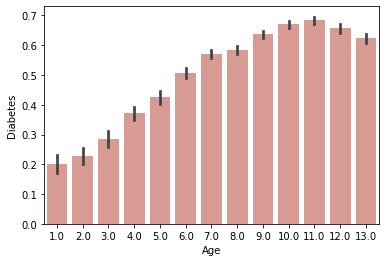

In [26]:
sns.barplot(x="Age", y="Diabetes", data=df,
                      color="salmon", saturation=.5)

In [27]:
'''plt.figure(figsize=(35,25))
p=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()'''

"plt.figure(figsize=(35,25))\np=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')\nplt.show()"

In [28]:
'''for int in df.columns:
    df[int] = df[int].astype('int')'''

"for int in df.columns:\n    df[int] = df[int].astype('int')"

In [29]:
'''for int in cor_test.columns:
    cor_test[int]=cor_test[int].astype('int')'''

"for int in cor_test.columns:\n    cor_test[int]=cor_test[int].astype('int')"

In [30]:
'''for feature in df:
    sns.countplot(data=df, x=feature, hue="Diabetes")
    plt.show()'''

'for feature in df:\n    sns.countplot(data=df, x=feature, hue="Diabetes")\n    plt.show()'

In [31]:
gen=df['Diabetes'][df['HighChol']==1]

In [32]:
gen.value_counts()

1.0    18452
0.0     8804
Name: Diabetes, dtype: int64

In [33]:
h=df['Diabetes'][df['HighChol']==1]

In [34]:
h.value_counts()

1.0    18452
0.0     8804
Name: Diabetes, dtype: int64

In [35]:
df.isnull().sum()

Age                     0
HighChol                0
CholCheck               0
BMI                     0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Hypertension            0
Stroke                  0
Diabetes                0
dtype: int64

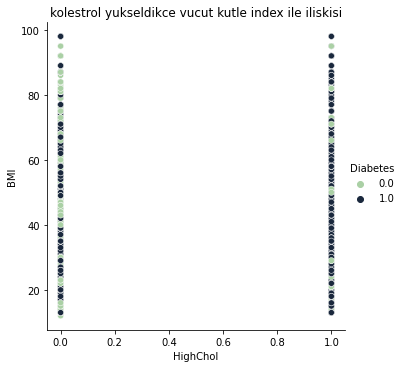

In [36]:
sns.relplot(
    data=df,
    x="HighChol", y="BMI",
    hue="Diabetes", palette="ch:r=-.5,l=.75").set(title='kolestrol yukseldikce vucut kutle index ile iliskisi')

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48527.0,8.723082,2.859969,1.0,7.0,9.0,11.0,13.0
HighChol,48527.0,0.561667,0.496188,0.0,0.0,1.0,1.0,1.0
CholCheck,48527.0,0.959878,0.196247,0.0,1.0,1.0,1.0,1.0
BMI,48527.0,31.149216,8.426706,12.0,26.0,30.0,35.0,98.0
HeartDiseaseorAttack,48527.0,0.197457,0.398084,0.0,0.0,0.0,0.0,1.0
PhysActivity,48527.0,0.594824,0.490931,0.0,0.0,1.0,1.0,1.0
GenHlth,48527.0,3.143817,1.105893,1.0,2.0,3.0,4.0,5.0
PhysHlth,48527.0,8.297113,10.859965,0.0,0.0,3.0,15.0,30.0
DiffWalk,48527.0,0.367280,0.482069,0.0,0.0,0.0,1.0,1.0
Hypertension,48527.0,0.607250,0.488367,0.0,0.0,1.0,1.0,1.0


In [38]:
df[(df["BMI"]<=20)]["Diabetes"].value_counts()

0.0    1412
1.0     709
Name: Diabetes, dtype: int64

<AxesSubplot:xlabel='BMI'>

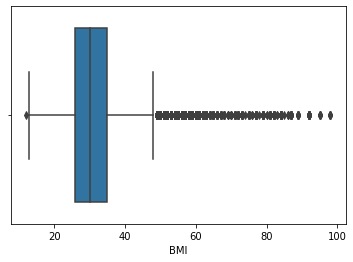

In [39]:
sns.boxplot(df["BMI"])

In [40]:
df

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes
0,4.0,0.0,1.0,26.0,0.0,1.0,3.0,30.0,0.0,1.0,0.0,0.0
1,12.0,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0
4,8.0,0.0,1.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80686,7.0,1.0,1.0,41.0,0.0,0.0,4.0,5.0,1.0,1.0,0.0,1.0
80687,3.0,0.0,1.0,23.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
80688,10.0,1.0,1.0,22.0,0.0,0.0,3.0,30.0,1.0,1.0,0.0,1.0
80690,4.0,1.0,0.0,29.0,0.0,1.0,3.0,15.0,0.0,0.0,0.0,0.0


In [41]:
df['BMI'].unique()

array([26., 28., 29., 18., 31., 32., 27., 24., 21., 58., 30., 20., 22.,
       38., 40., 25., 36., 47., 19., 37., 41., 23., 34., 35., 42., 17.,
       33., 44., 15., 52., 69., 56., 45., 39., 92., 53., 98., 50., 46.,
       79., 48., 16., 63., 72., 54., 49., 68., 43., 84., 73., 76., 55.,
       51., 75., 57., 60., 12., 77., 82., 67., 71., 61., 14., 81., 59.,
       86., 13., 87., 65., 95., 89., 62., 64., 66., 85., 70., 83., 80.,
       78., 74.])

In [42]:
df['BMI'].value_counts()

27.0    3694
30.0    3089
26.0    2748
28.0    2725
29.0    2667
        ... 
80.0       2
12.0       1
85.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64

Age                        AxesSubplot(0.125,0.787927;0.168478x0.0920732)
HighChol                AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
CholCheck               AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
BMI                     AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
HeartDiseaseorAttack       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
PhysActivity            AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
GenHlth                 AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
PhysHlth                AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
DiffWalk                   AxesSubplot(0.125,0.566951;0.168478x0.0920732)
Hypertension            AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
Stroke                  AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
Diabetes                AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
dtype: object

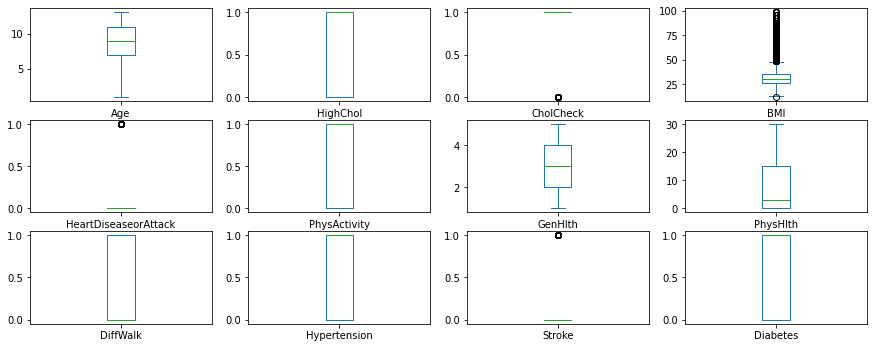

In [43]:
df.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14))

In [44]:
'''df.loc[(df['PhysHlth']<=5),'PhysHlth']=1
df.loc[(df['PhysHlth']<=15) & (df['PhysHlth']>5),'PhysHlth']=2
df.loc[(df['PhysHlth']<=30) & (df['PhysHlth']>15),'PhysHlth']=3'''


"df.loc[(df['PhysHlth']<=5),'PhysHlth']=1\ndf.loc[(df['PhysHlth']<=15) & (df['PhysHlth']>5),'PhysHlth']=2\ndf.loc[(df['PhysHlth']<=30) & (df['PhysHlth']>15),'PhysHlth']=3"

In [45]:
'''cor_test.loc[(cor_test['PhysHlth']<=5),'PhysHlth']=1
cor_test.loc[(cor_test['PhysHlth']<=15) & (cor_test['PhysHlth']>5),'PhysHlth']=2
cor_test.loc[(cor_test['PhysHlth']<=30) & (cor_test['PhysHlth']>15),'PhysHlth']=3'''

"cor_test.loc[(cor_test['PhysHlth']<=5),'PhysHlth']=1\ncor_test.loc[(cor_test['PhysHlth']<=15) & (cor_test['PhysHlth']>5),'PhysHlth']=2\ncor_test.loc[(cor_test['PhysHlth']<=30) & (cor_test['PhysHlth']>15),'PhysHlth']=3"

In [46]:
#bmi=df.sort_values(by='BMI',ascending=False)

In [47]:
df.shape

(48527, 12)

In [48]:
df=df[df['BMI']<45]

In [49]:
df['BMI'].unique()

array([26., 28., 29., 18., 31., 32., 27., 24., 21., 30., 20., 22., 38.,
       40., 25., 36., 19., 37., 41., 23., 34., 35., 42., 17., 33., 44.,
       15., 39., 16., 43., 12., 14., 13.])

In [50]:
df

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes
0,4.0,0.0,1.0,26.0,0.0,1.0,3.0,30.0,0.0,1.0,0.0,0.0
1,12.0,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0
4,8.0,0.0,1.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80686,7.0,1.0,1.0,41.0,0.0,0.0,4.0,5.0,1.0,1.0,0.0,1.0
80687,3.0,0.0,1.0,23.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
80688,10.0,1.0,1.0,22.0,0.0,0.0,3.0,30.0,1.0,1.0,0.0,1.0
80690,4.0,1.0,0.0,29.0,0.0,1.0,3.0,15.0,0.0,0.0,0.0,0.0


In [51]:
#df[['Age','HighChol','BMI','HeartDiseaseorAttack','GenHlth','Hypertension','Diabetes']].groupby(['Age','HighChol','BMI','HeartDiseaseorAttack','GenHlth','Hypertension'], as_index=False).mean().sort_values(by='Diabetes', ascending = False)

In [52]:
df['Risk']=0
cor_test['Risk']=0

In [53]:
df.loc[((df["Age"]==1) & (df["BMI"]>=24) & (df["PhysActivity"]==0) & (df['HighChol']==1)& (df['Hypertension']==1)), "Risk"] = 1
df.loc[((df["Age"]==2) | (df["Age"]==3)) &((df["BMI"]<=20) | (df["BMI"]>=25)) & (df["PhysActivity"]==0)& (df['HighChol']==1)& (df['Hypertension']==1) , "Risk"] = 1
df.loc[((df["Age"]==4) | (df["Age"]==5)) &((df["BMI"]<=21) | (df["BMI"]>=26)) & (df["PhysActivity"]==0)& (df['HighChol']==1)& (df['Hypertension']==1) , "Risk"] = 1
df.loc[((df["Age"]==6) | (df["Age"]==7)) &((df["BMI"]<=22) | (df["BMI"]>=27)) & (df["PhysActivity"]==0)& (df['HighChol']==1)& (df['Hypertension']==1) , "Risk"] = 1
df.loc[((df["Age"]==8) | (df["Age"]==9)) & ((df["BMI"]<=23) | (df["BMI"]>=28)) & (df["PhysActivity"]==0) & (df['HighChol']==1)& (df['Hypertension']==1) , "Risk"] = 1
df.loc[(df["Age"]>=10) &((df["BMI"]<=24) | (df["BMI"]>=29)) & (df["PhysActivity"]==0)& (df['HighChol']==1)& (df['Hypertension']==1), "Risk"] = 1

In [54]:
cor_test.loc[~(cor_test["Age"]==1) & ((cor_test["BMI"]<=18) | (cor_test["BMI"]>=24)) & (cor_test["PhysActivity"]==0) & (cor_test['HighChol']==1)& (cor_test['Hypertension']==1) , "Risk"] = 1
cor_test.loc[~((cor_test["Age"]==2) | (cor_test["Age"]==3)) & ((cor_test["BMI"]<=20) | (cor_test["BMI"]>=25)) & (cor_test["PhysActivity"]==0)& (cor_test['HighChol']==1)& (cor_test['Hypertension']==1) , "Risk"] = 1
cor_test.loc[~((cor_test["Age"]==4) | (cor_test["Age"]==5)) & ((cor_test["BMI"]<=21) | (cor_test["BMI"]>=26)) & (cor_test["PhysActivity"]==0)& (cor_test['HighChol']==1)& (cor_test['Hypertension']==1) , "Risk"] = 1
cor_test.loc[~((cor_test["Age"]==6) | (cor_test["Age"]==7)) & ((cor_test["BMI"]<=22) | (cor_test["BMI"]>=27)) & (cor_test["PhysActivity"]==0)& (cor_test['HighChol']==1)& (cor_test['Hypertension']==1) , "Risk"] = 1
cor_test.loc[~((cor_test["Age"]==8) | (cor_test["Age"]==9)) & ((cor_test["BMI"]<=23) | (cor_test["BMI"]>=28)) & (cor_test["PhysActivity"]==0) & (cor_test['HighChol']==1)& (cor_test['Hypertension']==1) , "Risk"] = 1
cor_test.loc[~(cor_test["Age"]>=10) & ((cor_test["BMI"]<=24) | (cor_test["BMI"]>=29)) & (cor_test["PhysActivity"]==0)& (cor_test['HighChol']==1)& (cor_test['Hypertension']==1) , "Risk"] = 1

In [55]:
df

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes,Risk
0,4.0,0.0,1.0,26.0,0.0,1.0,3.0,30.0,0.0,1.0,0.0,0.0,0
1,12.0,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0
2,13.0,0.0,1.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0
3,11.0,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,0
4,8.0,0.0,1.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80686,7.0,1.0,1.0,41.0,0.0,0.0,4.0,5.0,1.0,1.0,0.0,1.0,1
80687,3.0,0.0,1.0,23.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0
80688,10.0,1.0,1.0,22.0,0.0,0.0,3.0,30.0,1.0,1.0,0.0,1.0,1
80690,4.0,1.0,0.0,29.0,0.0,1.0,3.0,15.0,0.0,0.0,0.0,0.0,0


In [56]:
df.corr()

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes,Risk
Age,1.000000,0.158616,0.112070,-0.055506,0.221471,-0.081675,0.114351,0.072058,0.203866,0.253668,0.134873,0.212786,0.097680
HighChol,0.158616,1.000000,0.107894,0.087965,0.166781,-0.060238,0.166799,0.103466,0.138357,0.235160,0.105212,0.209540,0.357971
CholCheck,0.112070,0.107894,1.000000,0.071497,0.078649,-0.035610,0.103844,0.076241,0.092239,0.136257,0.045839,0.149753,0.051337
BMI,-0.055506,0.087965,0.071497,1.000000,0.028031,-0.079606,0.129547,0.042365,0.140272,0.172158,-0.005761,0.213929,0.179031
HeartDiseaseorAttack,0.221471,0.166781,0.078649,0.028031,1.000000,-0.036269,0.211570,0.124838,0.175053,0.196331,0.194367,0.175584,0.110586
PhysActivity,-0.081675,-0.060238,-0.035610,-0.079606,-0.036269,1.000000,-0.167087,-0.123608,-0.192575,-0.076957,-0.048622,-0.109331,-0.496418
GenHlth,0.114351,0.166799,0.103844,0.129547,0.211570,-0.167087,1.000000,0.447814,0.377447,0.220290,0.147669,0.290769,0.181169
PhysHlth,0.072058,0.103466,0.076241,0.042365,0.124838,-0.123608,0.447814,1.000000,0.350962,0.119568,0.112623,0.134255,0.126663
DiffWalk,0.203866,0.138357,0.092239,0.140272,0.175053,-0.192575,0.377447,0.350962,1.000000,0.200397,0.155470,0.224337,0.194571
Hypertension,0.253668,0.235160,0.136257,0.172158,0.196331,-0.076957,0.220290,0.119568,0.200397,1.000000,0.135419,0.263728,0.329513


In [57]:
df.loc[(df['Risk'].isnull(),'Risk')]=0

In [58]:
cor_test.loc[(cor_test['Risk'].isnull(),'Risk')]=0

In [59]:
'''df['BMI'] = np.log(df.BMI)
df['BMI'].hist()'''

"df['BMI'] = np.log(df.BMI)\ndf['BMI'].hist()"

In [60]:
#cor_test['BMI'] = np.log(df.BMI)

In [61]:
#df.hist(figsize=(20, 16))

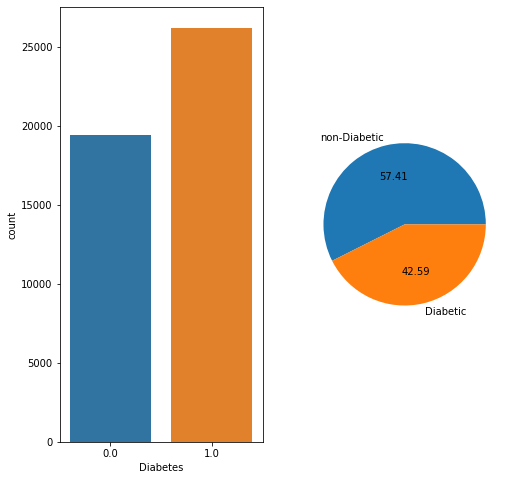

In [62]:
warnings.filterwarnings('ignore')

figure1, plot1 = plt.subplots(1,2,figsize=(8,8))

sns.countplot(df['Diabetes'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(df["Diabetes"].value_counts() , labels =labels ,autopct='%.02f' );

In [63]:
cor_test.shape

(20000, 12)

In [64]:
df.shape

(45660, 13)

In [65]:
df.corr()

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes,Risk
Age,1.000000,0.158616,0.112070,-0.055506,0.221471,-0.081675,0.114351,0.072058,0.203866,0.253668,0.134873,0.212786,0.097680
HighChol,0.158616,1.000000,0.107894,0.087965,0.166781,-0.060238,0.166799,0.103466,0.138357,0.235160,0.105212,0.209540,0.357971
CholCheck,0.112070,0.107894,1.000000,0.071497,0.078649,-0.035610,0.103844,0.076241,0.092239,0.136257,0.045839,0.149753,0.051337
BMI,-0.055506,0.087965,0.071497,1.000000,0.028031,-0.079606,0.129547,0.042365,0.140272,0.172158,-0.005761,0.213929,0.179031
HeartDiseaseorAttack,0.221471,0.166781,0.078649,0.028031,1.000000,-0.036269,0.211570,0.124838,0.175053,0.196331,0.194367,0.175584,0.110586
PhysActivity,-0.081675,-0.060238,-0.035610,-0.079606,-0.036269,1.000000,-0.167087,-0.123608,-0.192575,-0.076957,-0.048622,-0.109331,-0.496418
GenHlth,0.114351,0.166799,0.103844,0.129547,0.211570,-0.167087,1.000000,0.447814,0.377447,0.220290,0.147669,0.290769,0.181169
PhysHlth,0.072058,0.103466,0.076241,0.042365,0.124838,-0.123608,0.447814,1.000000,0.350962,0.119568,0.112623,0.134255,0.126663
DiffWalk,0.203866,0.138357,0.092239,0.140272,0.175053,-0.192575,0.377447,0.350962,1.000000,0.200397,0.155470,0.224337,0.194571
Hypertension,0.253668,0.235160,0.136257,0.172158,0.196331,-0.076957,0.220290,0.119568,0.200397,1.000000,0.135419,0.263728,0.329513


In [66]:
df

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes,Risk
0,4.0,0.0,1.0,26.0,0.0,1.0,3.0,30.0,0.0,1.0,0.0,0.0,0
1,12.0,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0
2,13.0,0.0,1.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0
3,11.0,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,0
4,8.0,0.0,1.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80686,7.0,1.0,1.0,41.0,0.0,0.0,4.0,5.0,1.0,1.0,0.0,1.0,1
80687,3.0,0.0,1.0,23.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0
80688,10.0,1.0,1.0,22.0,0.0,0.0,3.0,30.0,1.0,1.0,0.0,1.0,1
80690,4.0,1.0,0.0,29.0,0.0,1.0,3.0,15.0,0.0,0.0,0.0,0.0,0


In [67]:
#diabet=train['Diabetes']

In [68]:
'''df.drop(columns=['Age','BMI'],inplace=True,axis=1)
cor_test.drop(columns=['Age','BMI'],inplace=True,axis=1)'''

"df.drop(columns=['Age','BMI'],inplace=True,axis=1)\ncor_test.drop(columns=['Age','BMI'],inplace=True,axis=1)"

In [69]:
'''df=pd.get_dummies(df,columns=['HighChol','CholCheck','GenHlth','PhysHlth'],drop_first=True)
cor_test=pd.get_dummies(cor_test,columns=['HighChol','CholCheck','GenHlth','PhysHlth'],drop_first=True)'''

"df=pd.get_dummies(df,columns=['HighChol','CholCheck','GenHlth','PhysHlth'],drop_first=True)\ncor_test=pd.get_dummies(cor_test,columns=['HighChol','CholCheck','GenHlth','PhysHlth'],drop_first=True)"

In [70]:
df.corr()

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Hypertension,Stroke,Diabetes,Risk
Age,1.000000,0.158616,0.112070,-0.055506,0.221471,-0.081675,0.114351,0.072058,0.203866,0.253668,0.134873,0.212786,0.097680
HighChol,0.158616,1.000000,0.107894,0.087965,0.166781,-0.060238,0.166799,0.103466,0.138357,0.235160,0.105212,0.209540,0.357971
CholCheck,0.112070,0.107894,1.000000,0.071497,0.078649,-0.035610,0.103844,0.076241,0.092239,0.136257,0.045839,0.149753,0.051337
BMI,-0.055506,0.087965,0.071497,1.000000,0.028031,-0.079606,0.129547,0.042365,0.140272,0.172158,-0.005761,0.213929,0.179031
HeartDiseaseorAttack,0.221471,0.166781,0.078649,0.028031,1.000000,-0.036269,0.211570,0.124838,0.175053,0.196331,0.194367,0.175584,0.110586
PhysActivity,-0.081675,-0.060238,-0.035610,-0.079606,-0.036269,1.000000,-0.167087,-0.123608,-0.192575,-0.076957,-0.048622,-0.109331,-0.496418
GenHlth,0.114351,0.166799,0.103844,0.129547,0.211570,-0.167087,1.000000,0.447814,0.377447,0.220290,0.147669,0.290769,0.181169
PhysHlth,0.072058,0.103466,0.076241,0.042365,0.124838,-0.123608,0.447814,1.000000,0.350962,0.119568,0.112623,0.134255,0.126663
DiffWalk,0.203866,0.138357,0.092239,0.140272,0.175053,-0.192575,0.377447,0.350962,1.000000,0.200397,0.155470,0.224337,0.194571
Hypertension,0.253668,0.235160,0.136257,0.172158,0.196331,-0.076957,0.220290,0.119568,0.200397,1.000000,0.135419,0.263728,0.329513


In [71]:
df.shape

(45660, 13)

In [72]:
cor_test.shape

(20000, 12)

In [73]:
x=df.drop(columns='Diabetes',axis=1)
#cor_test=cor_test[['HighChol','BMI','GenHlth','Hypertension']]
y=df['Diabetes']

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=0)

In [75]:
!pip install flaml
from sklearn.metrics import mean_absolute_percentage_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 1.4 MB/s eta 0:00:00


In [76]:
from flaml import AutoML
automl = AutoML()

In [77]:
automl.fit(x_train, y_train, task="classification",metric='roc_auc',time_budget=300)

[flaml.automl: 12-03 19:19:36] {2599} INFO - task = classification
[flaml.automl: 12-03 19:19:36] {2601} INFO - Data split method: stratified
[flaml.automl: 12-03 19:19:36] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-03 19:19:36] {2726} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 12-03 19:19:36] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 12-03 19:19:36] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-03 19:19:37] {3297} INFO - Estimated sufficient time budget=3875s. Estimated necessary time budget=95s.
[flaml.automl: 12-03 19:19:37] {3349} INFO -  at 0.7s,	estimator lgbm's best error=0.2803,	best estimator lgbm's best error=0.2803
[flaml.automl: 12-03 19:19:37] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-03 19:19:37] {3349} INFO -  at 1.0s,	estimator lgbm's best error=0.2803,	best estimator lgbm's best error=0.2803
[flaml.auto

In [78]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import xgboost as xgb 
from xgboost import cv

In [79]:
'''import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor'''
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=0)

In [80]:
'''from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300, 400],
    'learning_rate' : [0.03, 0.06, 0.1, 0.3],
    'reg_alpha' : range(2, 7, 2),
    #'reg_lambda' : [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth' : [3, 4],
    #'min_child_weight' : range(1, 6),
    'subsample' : [0.8, 0.9]    
}

CV_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv= 5)
CV_xgb.fit(x, y)
print(CV_xgb.best_params_)'''


"from sklearn.model_selection import GridSearchCV\nparam_grid = {\n    'n_estimators': [300, 400],\n    'learning_rate' : [0.03, 0.06, 0.1, 0.3],\n    'reg_alpha' : range(2, 7, 2),\n    #'reg_lambda' : [0.1, 0.2, 0.3, 0.4, 0.5],\n    'max_depth' : [3, 4],\n    #'min_child_weight' : range(1, 6),\n    'subsample' : [0.8, 0.9]    \n}\n\nCV_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv= 5)\nCV_xgb.fit(x, y)\nprint(CV_xgb.best_params_)"

In [81]:
from datetime import datetime

model = xgb.XGBClassifier(n_estimators = 95,
                            max_leaves= 22,
                            learning_rate =  0.056057349376686424,
                            objective = 'binary:logistic',
                            min_split_loss = 0.05,
                            colsample_bylevel= 0.8338434007513006,
                            max_depth = 4,
                            reg_alpha = 0.004473635521006217,
                            reg_lambda =  0.15851678308484152,
                            subsample =0.9442946098381059,
                            min_child_weight = 13.017567406702602,
                            colsample_bytree =  0.7377857945978481,
                            gamma = 5,
                            random_state = 50)
"""model = RandomForestClassifier(n_estimators = 300,
                               criterion = 'entropy',
                               max_depth = 3,
                               random_state = 0)"""

start = datetime.now()
model.fit(x_train, y_train)
predict_test = model.predict(x_test)
end = datetime.now()

print('XGBoost Training time: ', (end-start).total_seconds(), ' seconds')
print("accuracy is %", round(accuracy_score(predict_test, y_test), 2)*100)
print("precision is %", round(precision_score(predict_test, y_test), 2)*100)
print("recall is %", round(recall_score(predict_test, y_test), 2)*100)
print("f1 is %", round(f1_score(predict_test, y_test), 2)*100)

XGBoost Training time:  1.130768  seconds
accuracy is % 70.0
precision is % 80.0
recall is % 70.0
f1 is % 75.0


In [82]:
#pred.shape

In [83]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best roc_auc on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 95, 'max_leaves': 22, 'min_child_weight': 13.017567406702602, 'learning_rate': 0.056057349376686424, 'subsample': 0.9442946098381059, 'colsample_bylevel': 0.8338434007513006, 'colsample_bytree': 0.7377857945978481, 'reg_alpha': 0.004473635521006217, 'reg_lambda': 0.15851678308484152}
Best roc_auc on validation data: 0.7645
Training duration of best run: 0.729 s


In [84]:
'''Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 95, 'max_leaves': 22, 'min_child_weight': 13.017567406702602, 'learning_rate': 0.056057349376686424, 'subsample': 0.9442946098381059, 'colsample_bylevel': 0.8338434007513006, 'colsample_bytree': 0.7377857945978481, 'reg_alpha': 0.004473635521006217, 'reg_lambda': 0.15851678308484152}
Best roc_auc on validation data: 0.7645
Training duration of best run: 0.7496 s'''

"Best ML leaner: xgboost\nBest hyperparmeter config: {'n_estimators': 95, 'max_leaves': 22, 'min_child_weight': 13.017567406702602, 'learning_rate': 0.056057349376686424, 'subsample': 0.9442946098381059, 'colsample_bylevel': 0.8338434007513006, 'colsample_bytree': 0.7377857945978481, 'reg_alpha': 0.004473635521006217, 'reg_lambda': 0.15851678308484152}\nBest roc_auc on validation data: 0.7645\nTraining duration of best run: 0.7496 s"

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_train, automl.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.69      0.57      0.63     16490
         1.0       0.72      0.81      0.76     22321

    accuracy                           0.71     38811
   macro avg       0.71      0.69      0.69     38811
weighted avg       0.71      0.71      0.70     38811



In [86]:
print(classification_report(y_test, automl.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.56      0.61      2958
         1.0       0.70      0.80      0.75      3891

    accuracy                           0.69      6849
   macro avg       0.69      0.68      0.68      6849
weighted avg       0.69      0.69      0.69      6849



In [87]:
id = pd.read_csv("../input/diabetes-prediction-competitiontfug-chd-nov-2022/sample_submission.csv")

In [88]:
Id=id['id']

In [89]:
pred=automl.predict(cor_test)

In [90]:
pred

array([1., 1., 1., ..., 1., 0., 0.])

In [91]:
pd_sb=pd.DataFrame({"id":Id,'Diabetes':pred})

In [92]:
pd_sb.head(10)

,id,Diabetes
0,0,1.0
1,1,1.0
2,2,1.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,1.0
7,7,1.0
8,8,0.0
9,9,0.0


In [93]:
pd_sb['Diabetes'].value_counts()

1.0    10256
0.0     9744
Name: Diabetes, dtype: int64

([<matplotlib.patches.Wedge at 0x7f21bd740d90>,
 [Text(-0.25366107476179733, 1.0703532403607185, 'non-Diabetic'),
  Text(0.25366107476179695, -1.0703532403607185, 'Diabetic')],
 [Text(-0.13836058623370762, 0.5838290401967555, '57.41'),
  Text(0.13836058623370742, -0.5838290401967555, '42.59')])

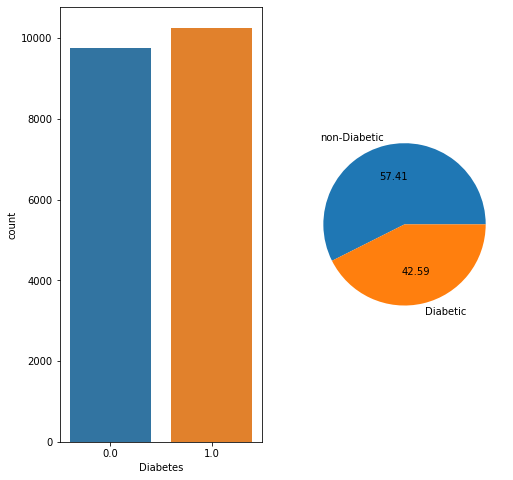

In [94]:
warnings.filterwarnings('ignore')

figure1, plot1 = plt.subplots(1,2,figsize=(8,8))

sns.countplot(pd_sb['Diabetes'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(df["Diabetes"].value_counts() , labels =labels ,autopct='%.02f' )

In [95]:
pd_sb.to_csv('submission.csv', index=False)